In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json
import re

Pull in the processed inventory

In [2]:
ra = "secoora"

#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).


ra_clean = re.sub(r'[0-9]', '', ra) # remove number from RA 

df = pd.read_excel('2024/data/processed/%s.xlsx' % ra_clean.upper(), dtype=str)
df.head()

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
0,SECOORA,CAP2,41029,Capers Nearshore,"MSI G2000 Buoy, all chain mooring",32.806485,-79.628485,moored_buoy,2005-02-11 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN
1,SECOORA,CAP2Wave,41065,Capers Nearshore Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.80633,-79.626517,moored_buoy,2021-07-05 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN
2,SECOORA,CHR60,41066,Charleston 60,"MSI G2000 Buoy, all chain mooring",32.542234,-79.663947,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",VEMCO VR2W Acoustic Receiver deployed on moori...
3,SECOORA,CHR60WAVE,41076,Charleston 60 Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.541617,-79.669117,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN
4,SECOORA,FRP2,41033,Fripp Nearshore,"MSI G2000 Buoy, all chain mooring",32.274528,-80.396233,moored_buoy,2005-02-09 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN


## Check column headers

The official column headers are found in the README at https://github.com/ioos/ioos-asset-inventory/tree/main. This checks the column headers from the RA inventory against our official column headers to see if anything is missing. The result will print out what columns are missing from the RA inventory and what columns the RA added to their inventory.

In [3]:
url = 'https://github.com/ioos/ioos-asset-inventory/tree/main'

import pandas as pd

df_fields = pd.read_html(url)#

control_fields = df_fields[2]['Field'].tolist()


def diff(a, b):
  if len(set(a) - set(b)) > 0:
    print(f"Columns missing: {set(a) - set(b)}")
  if len(set(b) - set(a)) > 0:
    print(f"Columns added: {set(b) - set(a)}")
  if set(a) == set(b):
    print(f"They are the same")

diff(control_fields, df.columns.tolist())

They are the same


Make a plot of all points.

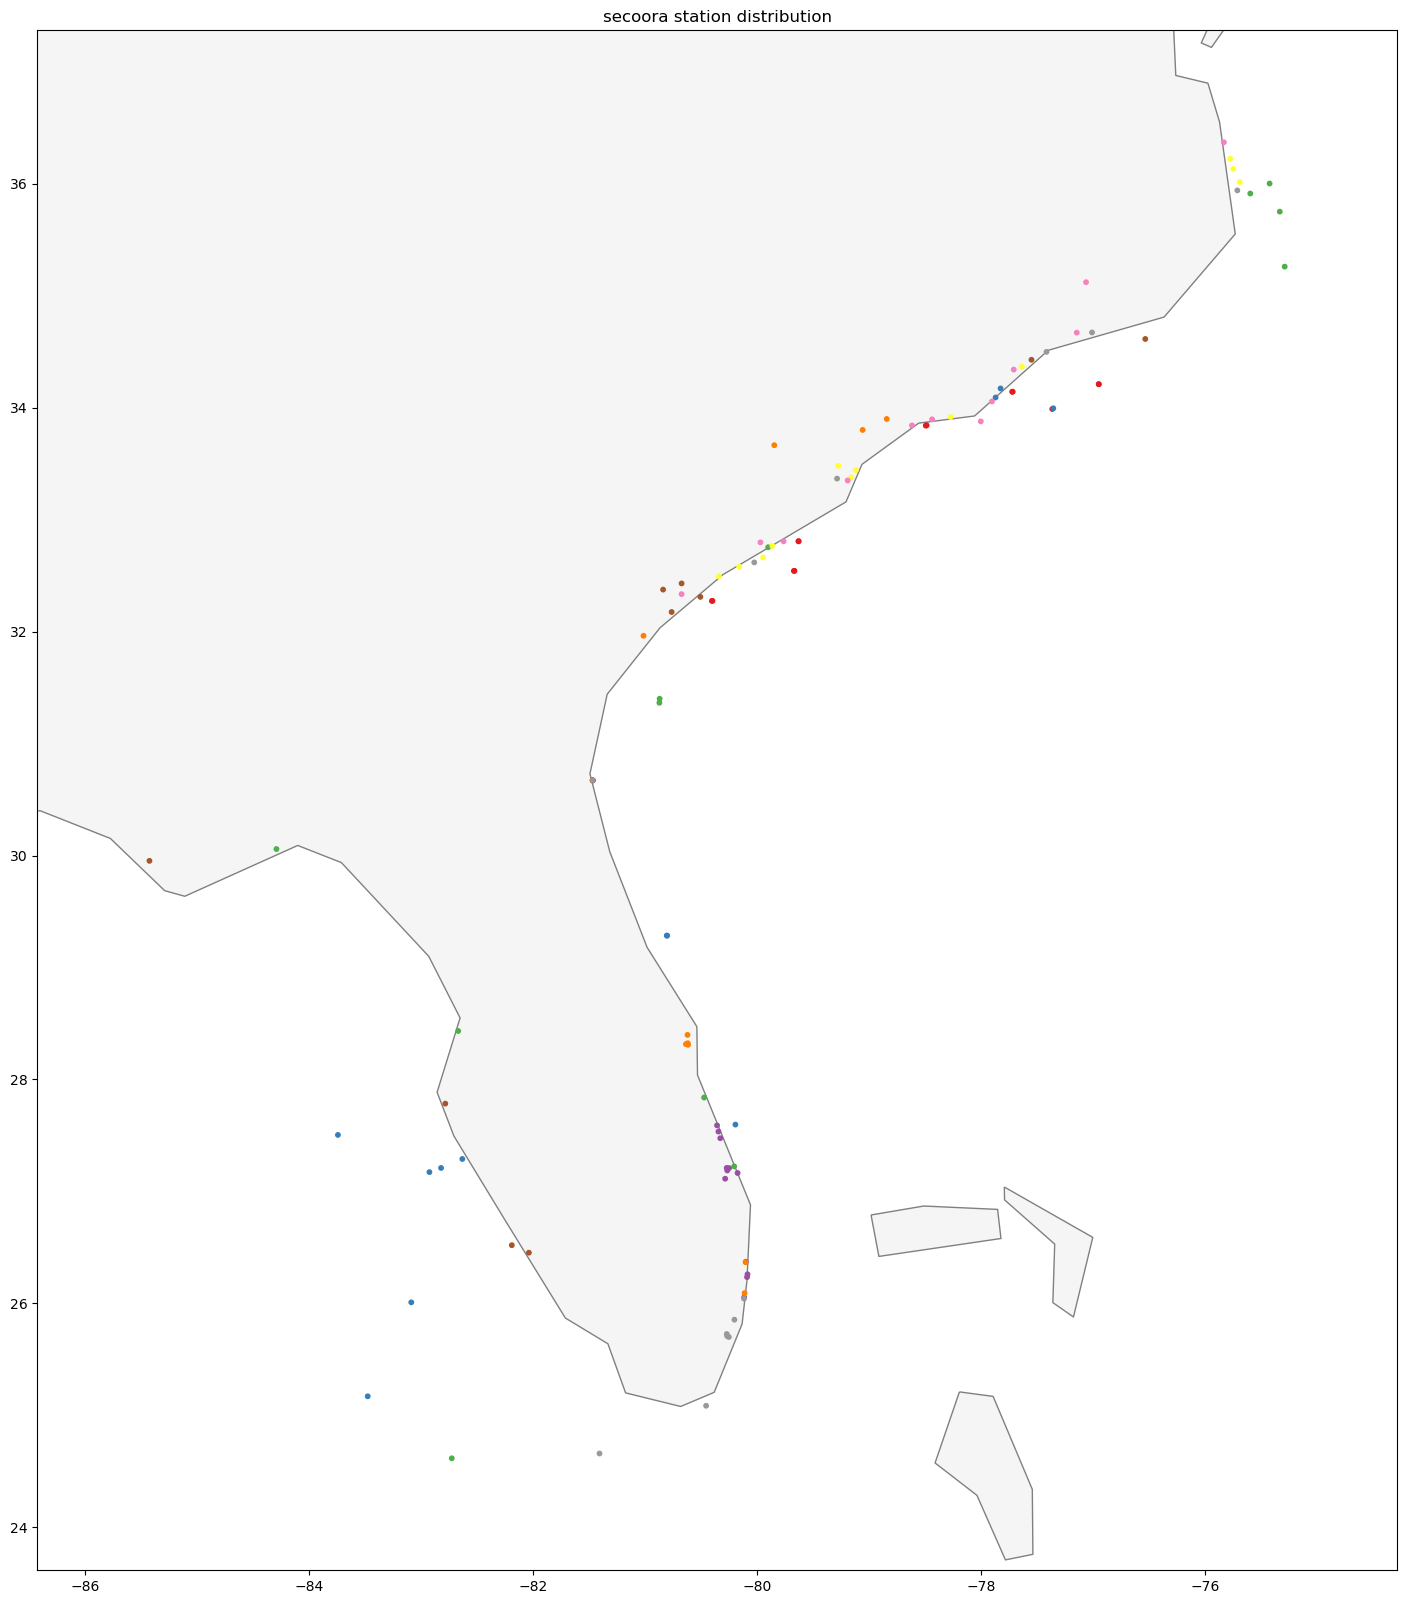

In [4]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='whitesmoke', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         #column='erddap_avail', 
         categorical=True, 
         cmap = 'Set1',
         markersize=10, 
         legend=True,
         legend_kwds={'title': "ERDDAP Available?"},
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)

plt.title('{} station distribution'.format(ra))

plt.show()

Make an interactive map.

When you click on a point the return is the information from the inventory.

In [6]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.loc[~gdf_final['geometry'].is_empty == True].drop(columns='Variable Names').explore()#'erddap_avail',cmap = 'Set1')


Configure the ERDDAP to search

In [7]:
with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls[ra.lower()]

print(server)

e = ERDDAP(server=server, protocol="tabledap")

http://erddap.secoora.org/erddap


Search the ERDDAP server for a single station of interest - more of a test

In [8]:
# df['Station ID'].loc[df['Station ID'].isna()] = df.loc[df['Station ID'].isna(),'Dataset ID']

# df['Station ID']

In [9]:
# df_wf = df[df['Station ID'] == 'Jug_Bay']

# # for SCCOOS need to search for 'Station Long Name' as 'Station ID' is NA for most entries
# search_for = df_wf['Station ID'].to_string()

# search_url = e.get_search_url(search_for=search_for, response="csv")

# try:
#     resp = pd.read_csv(search_url)
#     print(resp['Station ID'])
# except:
#     pass

Rip through all the datasets in the inventory and see if they exist on the RA erddap. Process checks the following order:

1. `Station ID`, then 
2. `Station Long Name`, then
3. `WMO ID or NWS/CMAN ID`

We first check if the value is `nan`. If so, we punt as that will return all datasets from the ERDDAP service.

In [29]:
not_found = []
found = dict()

exclude = ' -gliders'


if ra == 'glos':
    search_order = ['Dataset (ERDDAP) ID','Station ID', 'Station Long Name']
elif ra == 'sccoos':
    search_order = ['Station Long Name', 'WMO ID or NWS/CMAN ID', 'Station Description']
else:
    search_order = ['Station ID', 'Station Long Name', 'WMO ID or NWS/CMAN ID']

# GLOS
#search_order = ['Dataset (ERDDAP) ID','Station ID', 'Station Long Name']
# SCCOOS
#search_order = ['Station Long Name', 'WMO ID or NWS/CMAN ID', 'Station Description']

for search1 in df[search_order[0]].astype(str):

    if search1 == "nan":
        print("punting with %s = nan\n" % search_order[0])
        not_found.append(search1)
        continue
    
    try:
        print('searching \"%s\" = \"%s\"' % (search_order[0], search1))
        search_url = e.get_search_url(search_for=search1+exclude, response="csv")
        resp = pd.read_csv(search_url)
        
        print("Found \"%s\": %s" % (search1,resp['Dataset ID'].values.tolist()))
        
        found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
        
    except:
        
        print('no dataset matching \"%s\"' % search1)
        search2 = df.loc[df[search_order[0]] == search1, search_order[1]].values.tolist()[0]
        
        if search2 == "nan":
                print("punting with %s = nan\n" % search_order[1])
                not_found.append(search1)
                continue
                
        try:
            
            print('searching \"%s\" = \"%s\"' % (search_order[1], search2))
            search_url = e.get_search_url(search_for=search2+exclude, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (search2,resp['Dataset ID'].values.tolist()))
            
            found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
            
        except:

            search3 = str(df.loc[df[search_order[0]] == search1, search_order[2]].values.tolist()[0])
            
            if search3 == "nan":
                print("punting with \"%s\" = nan\n" % search_order[2])
                not_found.append(search1)
                continue
            
            try:
                print('searching \"%s\" = \"%s\"' % (search_order[2], search3))
                search_url = e.get_search_url(search_for=search3+exclude, response="csv")
                resp = pd.read_csv(search_url)
                print("Found \"%s\": %s" % (search3,resp['Dataset ID'].values.tolist()))
                
                found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
                
            except:
                print("Couldn't find:", [search1, search2, search3])
                not_found.append(search1)
        
    print("\n")

searching "Station ID" = "CAP2"
Found "CAP2": ['org_cormp_cap2', 'cap2wave-capers-nearshore-wave']


searching "Station ID" = "CAP2Wave"
Found "CAP2Wave": ['cap2wave-capers-nearshore-wave']


searching "Station ID" = "CHR60"
Found "CHR60": ['41066-chr60-19-nm-se-of-charlest', '41076-chr60wave-19-nm-se-of-char']


searching "Station ID" = "CHR60WAVE"
Found "CHR60WAVE": ['41076-chr60wave-19-nm-se-of-char']


searching "Station ID" = "FRP2"
Found "FRP2": ['org_cormp_frp2', '41067-frp2wave-4-nm-southeast-of']


searching "Station ID" = "FRP2WAVE"
Found "FRP2WAVE": ['41067-frp2wave-4-nm-southeast-of']


searching "Station ID" = "ILM2"
Found "ILM2": ['org_cormp_ilm2', '41110-ilm2wave-ilm2w-5-miles-']


searching "Station ID" = "ILM3"
Found "ILM3": ['org_cormp_ilm3']


searching "Station ID" = "LEJ3"
Found "LEJ3": ['org_cormp_lej3', '41159-lej3wave-lej3w-onslow-b']


searching "Station ID" = "LEJ3Wave"
Found "LEJ3Wave": ['41159-lej3wave-lej3w-onslow-b']


searching "Station ID" = "ILM2Wave"
F

Print the stations that we couldn't find.

In [11]:
len(not_found)

110

In [12]:
len(found)

0

Show me the record that has NaN for the first search element.

In [13]:
df.loc[df[search_order[0]].isna()]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry


Now show me the stations, with identifiers, that we couldn't find.

In [14]:
df[df[search_order[0]].isin(not_found)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry
0,SECOORA,CAP2,41029,Capers Nearshore,"MSI G2000 Buoy, all chain mooring",32.806485,-79.628485,moored_buoy,2005-02-11 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN,POINT (-79.62848 32.80649)
1,SECOORA,CAP2Wave,41065,Capers Nearshore Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.80633,-79.626517,moored_buoy,2021-07-05 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN,POINT (-79.62652 32.80633)
2,SECOORA,CHR60,41066,Charleston 60,"MSI G2000 Buoy, all chain mooring",32.542234,-79.663947,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",VEMCO VR2W Acoustic Receiver deployed on moori...,POINT (-79.66395 32.54223)
3,SECOORA,CHR60WAVE,41076,Charleston 60 Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.541617,-79.669117,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN,POINT (-79.66912 32.54162)
4,SECOORA,FRP2,41033,Fripp Nearshore,"MSI G2000 Buoy, all chain mooring",32.274528,-80.396233,moored_buoy,2005-02-09 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN,POINT (-80.39623 32.27453)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,SECOORA,Coral Gables,NaN,Coral Gables #3 (urban mangrove site @ Matheso...,Fixed,25.70806,-80.26444,fixed,11/2021-present,O,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-80.26444 25.70806)
106,SECOORA,Hollywood Beach,NaN,Hollywood Beach,Fixed,26.04278,-80.11444,fixed,01/2022-present,Y,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-80.11444 26.04278)
107,SECOORA,Key Largo Ranger Station,NaN,Key Largo Ranger Station,Fixed,25.08647,-80.45305,fixed,03/2022-present,Y,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-80.45305 25.08647)
108,SECOORA,Ramrod Key,NaN,Ramrod Key,Fixed,24.66,-81.405,fixed,04/2022-present,Y,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-81.40500 24.66000)


Print out all the dataset IDs for the datasets that matched our criteria.

In [15]:
found

{}

Check if each found dataset has coverage for specified CY

In [16]:
valid_datasets = []

cy = '2024'

for key in found:
    
    print(f'testing {key}')
    
    dataset_id = found[key]['Dataset ID'] #+" "+found[key]['Station ID']
    
    if len(dataset_id)>1:
        
        for dataset in dataset_id:
            
            e.dataset_id = dataset
    
            e.constraints = {
                 "time>=": "{}-01-01".format(cy)
            }
        
            e.variables = ['time']
    
            try:
                df_data = e.to_pandas(parse_dates=True)
                valid_datasets.extend([key])
                
            except:

                print(f'No data for {cy} for {key}: dataset ID {e.dataset_id}')# % (key,e.dataset_id))

                pass

                

    else:
        
        e.dataset_id = dataset_id[0]
    
        e.constraints = {
                         "time>=": "{}-01-01".format(cy)
                        }
        
        e.variables = ['time']
        
        try:
            
            df_data = e.to_pandas(parse_dates=True)

            valid_datasets.extend([key])

        except:

            print(f'No data for {cy} for {key}: dataset ID {e.dataset_id}')# % (key,e.dataset_id))
            
            pass

            #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

            
#for valid in sorted(set(valid_datasets)):
    
#     # drop qc vars
#     cols = [c for c in df_data.columns if 'qc' not in c]
#     cols = [c for c in cols if 'QARTOD' not in c]

#     df_data = df_data[cols]

#     # set index for plotting
#     df_data = df_data.set_index(df_data['time (UTC)'])

#     # plot
#     #df_data.plot(subplots=True, title=e.dataset_id,figsize=(20,20))

#     start_time = df_data['time (UTC)'].min()
#     end_time = df_data['time (UTC)'].max()

#     print('Dataset %s' % e.dataset_id)
#     print('Duration: %s - %s' % (start_time, end_time))

no_cov_datasets = found.keys() - sorted(set(valid_datasets))

print('Datasets without coverage for {}:\n{}'.format(cy,no_cov_datasets))

Datasets without coverage for 2024:
set()


Show me the inventory metadata about the invalid stations:

In [17]:
bad_stations = df.loc[(df[search_order[0]].isin(no_cov_datasets)) | df[search_order[0]].isin(not_found)]

df['erddap_not_avail'] = df[search_order[0]].isin(bad_stations[search_order[0]])

df.loc[df['erddap_not_avail']]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry,erddap_not_avail
0,SECOORA,CAP2,41029,Capers Nearshore,"MSI G2000 Buoy, all chain mooring",32.806485,-79.628485,moored_buoy,2005-02-11 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN,POINT (-79.62848 32.80649),True
1,SECOORA,CAP2Wave,41065,Capers Nearshore Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.80633,-79.626517,moored_buoy,2021-07-05 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN,POINT (-79.62652 32.80633),True
2,SECOORA,CHR60,41066,Charleston 60,"MSI G2000 Buoy, all chain mooring",32.542234,-79.663947,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",VEMCO VR2W Acoustic Receiver deployed on moori...,POINT (-79.66395 32.54223),True
3,SECOORA,CHR60WAVE,41076,Charleston 60 Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.541617,-79.669117,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN,POINT (-79.66912 32.54162),True
4,SECOORA,FRP2,41033,Fripp Nearshore,"MSI G2000 Buoy, all chain mooring",32.274528,-80.396233,moored_buoy,2005-02-09 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN,POINT (-80.39623 32.27453),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,SECOORA,Coral Gables,NaN,Coral Gables #3 (urban mangrove site @ Matheso...,Fixed,25.70806,-80.26444,fixed,11/2021-present,O,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-80.26444 25.70806),True
106,SECOORA,Hollywood Beach,NaN,Hollywood Beach,Fixed,26.04278,-80.11444,fixed,01/2022-present,Y,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-80.11444 26.04278),True
107,SECOORA,Key Largo Ranger Station,NaN,Key Largo Ranger Station,Fixed,25.08647,-80.45305,fixed,03/2022-present,Y,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-80.45305 25.08647),True
108,SECOORA,Ramrod Key,NaN,Ramrod Key,Fixed,24.66,-81.405,fixed,04/2022-present,Y,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-81.40500 24.66000),True


Invert the `erddap_not_avail` column and drop it.

In [18]:
df['erddap_avail'] = ~df['erddap_not_avail']

df.drop(columns='erddap_not_avail', inplace=True)

df

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry,erddap_avail
0,SECOORA,CAP2,41029,Capers Nearshore,"MSI G2000 Buoy, all chain mooring",32.806485,-79.628485,moored_buoy,2005-02-11 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN,POINT (-79.62848 32.80649),False
1,SECOORA,CAP2Wave,41065,Capers Nearshore Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.80633,-79.626517,moored_buoy,2021-07-05 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN,POINT (-79.62652 32.80633),False
2,SECOORA,CHR60,41066,Charleston 60,"MSI G2000 Buoy, all chain mooring",32.542234,-79.663947,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",VEMCO VR2W Acoustic Receiver deployed on moori...,POINT (-79.66395 32.54223),False
3,SECOORA,CHR60WAVE,41076,Charleston 60 Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.541617,-79.669117,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN,POINT (-79.66912 32.54162),False
4,SECOORA,FRP2,41033,Fripp Nearshore,"MSI G2000 Buoy, all chain mooring",32.274528,-80.396233,moored_buoy,2005-02-09 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN,POINT (-80.39623 32.27453),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,SECOORA,Coral Gables,NaN,Coral Gables #3 (urban mangrove site @ Matheso...,Fixed,25.70806,-80.26444,fixed,11/2021-present,O,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-80.26444 25.70806),False
106,SECOORA,Hollywood Beach,NaN,Hollywood Beach,Fixed,26.04278,-80.11444,fixed,01/2022-present,Y,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-80.11444 26.04278),False
107,SECOORA,Key Largo Ranger Station,NaN,Key Largo Ranger Station,Fixed,25.08647,-80.45305,fixed,03/2022-present,Y,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-80.45305 25.08647),False
108,SECOORA,Ramrod Key,NaN,Ramrod Key,Fixed,24.66,-81.405,fixed,04/2022-present,Y,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-81.40500 24.66000),False


Make a plot of all points and color based on ERDDAP available or not.

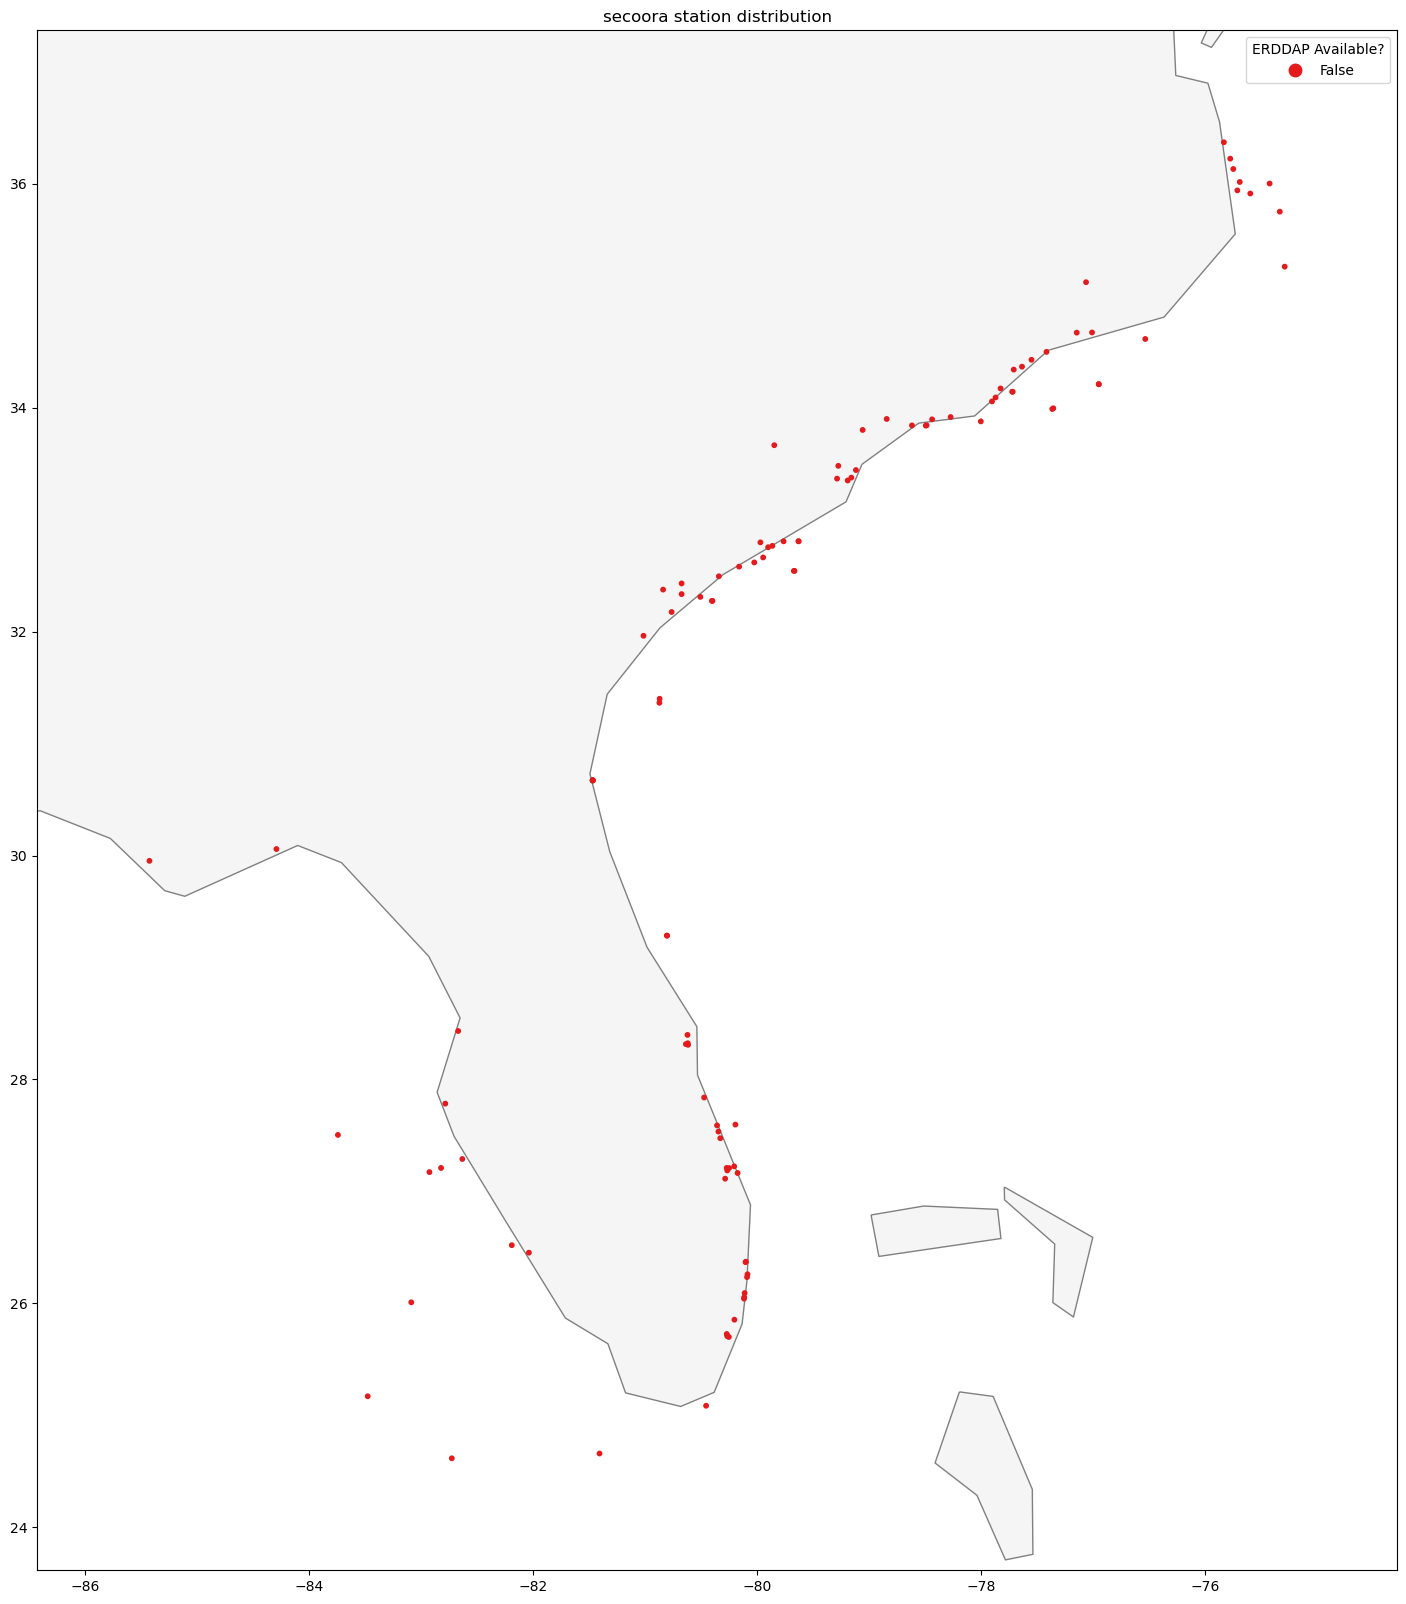

In [19]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='whitesmoke', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         column='erddap_avail', 
         categorical=True, 
         cmap = 'Set1',
         markersize=10, 
         legend=True,
         legend_kwds={'title': "ERDDAP Available?"},
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)

plt.title('{} station distribution'.format(ra))

plt.show()

Make an interactive map.

When you click on a point the return is the information from the inventory.

In [20]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.loc[~gdf_final['geometry'].is_empty == True].drop(columns='Variable Names').explore('erddap_avail',cmap = 'Set1', style_kwds={"radius":5})


## Show me some bad coordinates

_if there are any_

In [21]:
gdf_final.loc[gdf_final['geometry'].is_empty == True]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry,erddap_avail


In [22]:
# import urllib.request
# for url in gdf_final.loc[gdf_final['erddap_not_avail'],'Station Description'].str.replace('url: ',''):
#     print(url)
#     try:
#         urllib.request.urlopen(url).getcode()
#     except:
#         print("URL broken: %s" % url)
#         print(gdf_final.loc[gdf_final['Station Description'].str.contains(url,regex=False),'Station ID'])

# Show me the stations where ERDDAP doesn't exist or provide a valid response.

Reasons:
* Station not found on RA erddap
* dataset found but no data for this CY.

In [23]:
gdf_final.loc[~gdf_final['erddap_avail']]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry,erddap_avail
0,SECOORA,CAP2,41029,Capers Nearshore,"MSI G2000 Buoy, all chain mooring",32.806485,-79.628485,moored_buoy,2005-02-11 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN,POINT (-79.62848 32.80649),False
1,SECOORA,CAP2Wave,41065,Capers Nearshore Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.80633,-79.626517,moored_buoy,2021-07-05 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN,POINT (-79.62652 32.80633),False
2,SECOORA,CHR60,41066,Charleston 60,"MSI G2000 Buoy, all chain mooring",32.542234,-79.663947,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",VEMCO VR2W Acoustic Receiver deployed on moori...,POINT (-79.66395 32.54223),False
3,SECOORA,CHR60WAVE,41076,Charleston 60 Wave,"Sofar Spotter Wave Buoy, poly line mooring, 17...",32.541617,-79.669117,moored_buoy,2022-03-17 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_surface_wave_significant_height, wave_peri...",NaN,POINT (-79.66912 32.54162),False
4,SECOORA,FRP2,41033,Fripp Nearshore,"MSI G2000 Buoy, all chain mooring",32.274528,-80.396233,moored_buoy,2005-02-09 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN,POINT (-80.39623 32.27453),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,SECOORA,Coral Gables,NaN,Coral Gables #3 (urban mangrove site @ Matheso...,Fixed,25.70806,-80.26444,fixed,11/2021-present,O,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-80.26444 25.70806),False
106,SECOORA,Hollywood Beach,NaN,Hollywood Beach,Fixed,26.04278,-80.11444,fixed,01/2022-present,Y,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-80.11444 26.04278),False
107,SECOORA,Key Largo Ranger Station,NaN,Key Largo Ranger Station,Fixed,25.08647,-80.45305,fixed,03/2022-present,Y,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-80.45305 25.08647),False
108,SECOORA,Ramrod Key,NaN,Ramrod Key,Fixed,24.66,-81.405,fixed,04/2022-present,Y,SECOORA,Yp,FIU,Academic,FIU,In Situ/SECOORA,sea_water_electrical_conductivity: sea_water_p...,Pressure transducer (CTD),POINT (-81.40500 24.66000),False


# Do some checking against the IOOS catalog

only for datasets that we couldn't find in ERDDAP (per above)

In [24]:
from ckanapi import RemoteCKAN
import xarray as xr

problem_datasets = []

ua = 'ckanapiioos/1.0 (+https://ioos.us/)'

#ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua, get_only=True)
ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua)
ioos_catalog

gdf_ckan = gdf_final.loc[~gdf_final['erddap_avail']]

for station in gdf_ckan['Station ID'].dropna():

    RA = gdf_ckan.loc[gdf_ckan['Station ID']==station,'RA'].tolist()[0]
    
    print('Station "{}" + RA "{}"'.format(station.lower(), RA.lower()))
    
    # build RA tag query
    fq = '+organization:{}'.format(RA.lower())

    # build free text query
    q = "\""+station.lower()+"\""+" -glider"

    query = ioos_catalog.address + '/dataset/?' + 'q=' + q + '&organization=' + RA.lower()
    
    print('Query: {}'.format(query.replace(" ","%20")))

    datasets = ioos_catalog.action.package_search(q=q, fq=fq)

    

    if datasets['count'] > 0:
        print('\tfound {} dataset(s):'.format(datasets['count']))
        
        for dataset in datasets['results']:
            print('\t',dataset['title'])
            
            
            if dataset['resources']:
                print('\t',dataset['resources'][0]['url'])

                start_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-begin")['value']
                end_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-end")['value']

                print('\t','Coverage Meta:\n\t\t', start_date,' - ',end_date,'\n')

                if 'thredds' in dataset['resources'][0]['url']:
                    ds = xr.open_dataset(dataset['resources'][0]['url'])

                    time_max = ds.time.max().values

                    time_min = ds.time.min().values


                    print('\tCoverage Data:\n\t\t', time_min,' - ',time_max, '\n')

                    if pd.to_datetime(end_date) < pd.to_datetime(time_max, utc=True):
                        test_date = pd.to_datetime(time_max, utc=True)

                else:
                    test_date = pd.to_datetime(end_date, utc=True)

                if test_date > pd.to_datetime('{}-01-01'.format(cy), utc=True):
                    print('\t{} is valid.'.format(station))
                    break
                else:
                    print('\t{} is not valid.'.format(station))

                    problem_datasets.append(station)
            
            else:
                print('\t{} missing additional metadata'.format(station))
                problem_datasets.append(station)
    else:
        print("\tNo datasets found!")
        problem_datasets.append(station)

Station "cap2" + RA "secoora"
Query: https://data.ioos.us/dataset/?q="cap2"%20-glider&organization=secoora
	found 11 dataset(s):
	 (41029 / CAP2) Capers Nearshore, SC
	 https://erddap.secoora.org/erddap/tabledap/org_cormp_cap2
	 Coverage Meta:
		 2005-02-11T19:00:35Z  -  2025-02-28T13:08:00Z 

	CAP2 is valid.
Station "cap2wave" + RA "secoora"
Query: https://data.ioos.us/dataset/?q="cap2wave"%20-glider&organization=secoora
	found 1 dataset(s):
	 (41065 / CAP2WAVE) Capers Nearshore Wave, SC
	 https://erddap.secoora.org/erddap/tabledap/cap2wave-capers-nearshore-wave
	 Coverage Meta:
		 2021-07-06T12:48:49Z  -  2025-02-28T12:50:00Z 

	CAP2Wave is valid.
Station "chr60" + RA "secoora"
Query: https://data.ioos.us/dataset/?q="chr60"%20-glider&organization=secoora
	found 2 dataset(s):
	 (41066 / CHR60) 19 NM SE of Charleston Harbor Met and Water
	 https://erddap.secoora.org/erddap/tabledap/41066-chr60-19-nm-se-of-charlest
	 Coverage Meta:
		 2022-03-18T01:08:00Z  -  2025-02-28T12:08:00Z 

	CHR

Check the datasets that didn't have coverage in ERDDAP or through IOOS catalog and see if they are **Currently Operational?**

In [25]:
gdf_ckan.loc[gdf_ckan['Station ID'].isin(problem_datasets)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry,erddap_avail
11,SECOORA,SUN2,41024,Sunset Nearshore,"MSI G2000 Buoy, all chain mooring",33.8419,-78.4837,moored_buoy,2005-06-06 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"air_pressure, air_temperature, relative_humidi...",NaN,POINT (-78.48370 33.84190),False
13,SECOORA,OB27,NaN,OB27,"Non-real time, bottom frame",33.9941,-77.3524,fixed,2000-04-15 00:00:00,Y,SECOORA,Yf,UNCW,Academic,UNCW,UNCW,"sea_water_to_direction (mult), eastward_sea_wa...",Non real time bottom mount mooring. VEMCO VR2W...,POINT (-77.35240 33.99410),False
23,SECOORA,C11,NaN,WFS 20m Bottom Mount,20m isobath,27.21,-82.82,bottom_mount,1998-07-13 00:00:00,Y,SECOORA,Yf,USF,Academic,USF,USF,"sea_water_practical_salinity (bottom 20 m), se...",Non real time bottom mount mooring.,POINT (-82.82000 27.21000),False
24,SECOORA,C15,NaN,WFS 10m Bottom Mount,10m isobath,27.29,-82.63,bottom_mount,1998-07-13 00:00:00,Y,SECOORA,Yf,USF,Academic,USF,USF,"sea_water_practical_salinity (bottom 20 m), se...",Non real time bottom mount mooring.,POINT (-82.63000 27.29000),False
25,SECOORA,C19,NaN,WFS 30m Bottom Mount,30m isobath,24.6172,-82.7243,bottom_mount,2003-09-19 00:00:00,Y,SECOORA/NOAA COMIT,N,USF,Academic,USF,USF,"sea_water_temperature (bottom, 27 m), sea_wate...",Non real time bottom mount mooring.,POINT (-82.72430 24.61720),False
26,SECOORA,OA sensors Grays Reef mooring,41008,Grays Reef,NDBC platform with OA instrumentation,31.4,-80.8681,moored_buoy,2006-08-01 00:00:00,Y,"NOAA PMEL, NDBC, SECOORA",Yp,UGA-PMEL/NDBC,"gov_federal, Academic",UGA,NOAA PMEL,partial_pressure_of_carbon_dioxide_in_sea_wate...,NaN,POINT (-80.86810 31.40000),False
27,SECOORA,Gray's Reef OA Seafloor Platform,NaN,Gray's Reef,OA Seafloor platform located inside the Resear...,31.364,-80.870267,Seafloor platform mounted on concrete base,2024-12-19 00:00:00,Y,"UGA, NOAA OAP, SECOORA",Yp,UGA,Academic,UGA,UGA,partial_pressure_of_carbon_dioxide_in_sea_wate...,NaN,POINT (-80.87027 31.36400),False
31,SECOORA,560,n/a not assigned,CSI-Jennette'sSpotter1,Spotter Buoy,35.912033,-75.593317,wave_buoy,2020-08-29 00:00:00,N,NC Renewable Ocean Energy Program,N,Coastal Studies Institute,Academic,UNC Coastal Studies Institute,Sofar,"sea_surface_wave_significant_height, sea_surfa...",Buoy in the surf zone - subject to outages. Wi...,POINT (-75.59332 35.91203),False
48,SECOORA,FAU Engineering East Water Level Sensor,NaN,FAU Engineering East Water Level Sensor,Water Level Sensor,26.3726429302866,-80.0978204516814,fixed,2022-08-01 00:00:00,Y,SECOORA,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,POINT (-80.09782 26.37264),False
50,SECOORA,Fernandina Beach Reference site,NaN,Fernandina Beach Reference site,Water Level Sensor,30.6713759365837,-81.4657736196695,fixed,2024-05-01 00:00:00,Y,SECOORA,NaN,CCU,Academic,CCU,FAU,water_surface_height_above_reference_datum,Water level sensor mounted to structure on lan...,POINT (-81.46577 30.67138),False


Print out the available metadata from the IOOS Catalog for the last dataset.

In [26]:
dataset

{'author': None,
 'author_email': None,
 'creator_user_id': '0ea3933c-4674-41dd-a17d-bfbc8c99bd75',
 'id': '90f38f5d-0718-47ca-a692-07a8cd92b799',
 'isopen': False,
 'license_id': None,
 'license_title': None,
 'maintainer': None,
 'maintainer_email': None,
 'metadata_created': '2025-01-17T12:29:19.947077',
 'metadata_modified': '2025-02-28T13:06:25.150608',
 'name': 'fernandina-beach-fl1',
 'notes': "Timeseries data from 'Fernandina Beach, FL' (fernandina-beach-4)",
 'num_resources': 5,
 'num_tags': 21,
 'organization': {'id': '09cf7d59-3604-44f7-9c2c-5909d9705e40',
  'name': 'secoora',
  'title': 'SECOORA',
  'type': 'organization',
  'description': 'SECOORA, the Southeast Coastal Ocean Observing Regional Association, is the regional solution to integrating coastal and ocean observing data and information in the Southeast United States. SECOORA is a 501(c)(3) nonprofit incorporated in September 2007 that coordinates coastal and ocean observing activities, and facilitates continuous d

In [27]:
# GLOS special case as they provide ERDDAP ID

# for dataset in gdf_final.loc[(~gdf_final['erddap_avail'] & ~gdf_final['Dataset (ERDDAP) ID'].isna()),'Dataset (ERDDAP) ID'].tolist():
#     print(dataset)
#     e.dataset_id = dataset
    
#     e.constraints = {
#                  "time>=": "{}-01-01".format(cy)
#             }
        
#     e.variables = ['time']
    
#     try:
        
#         df_data = e.to_pandas(parse_dates=True)
        
#         string = '\tDate range: {} - {}'.format(df_data.min()[0],df_data.max()[0])
        
#         print(string)
        
#         if pd.to_datetime(df_data.max()[0], utc=True) > pd.to_datetime('{}-01-01'.format(cy), utc=True):
            
#             datasetid = gdf_final.loc[gdf_final['Dataset (ERDDAP) ID']==dataset,'Station ID'].tolist()[0]
            
#             problem_datasets.remove(datasetid)
        
#     except:
#         print('\tNo valid data')

In [28]:
#gdf_ckan.loc[gdf_ckan['Station ID'].isin(problem_datasets)]